# Milestone 2

> Siqiao Yuan (23233331)

---

## **1. Introduction**

### 1.1 Import All Necessary Libraries
In milestone 2, I will be using the libraries that we have learnt during this course including  *Pandas*, *Numpy*, *Matplotlib*,and *Seaborn* 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pdp
import matplotlib.pyplot as plt

---
### 1.2 Load in Medical cost dataset

In [6]:
medical_Cost = pd.read_csv('Medical_Cost.csv')
medical_Cost
# Loading the data into the dataframe.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


---
### 1.3 Getting to know the dataset better with *basic Pandas functions*

Pandas enables us to be able to know the data better.

In [7]:
medical_Cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
medical_Cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


medical_Cost.info() function allows us to have a better look at the attribute of the each element of the data.

In [9]:
medical_Cost.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

medical_Cost.info function gives us the number of rows(entries) and columns(attributs) of the dataset.

> **medical_Cost.shape** will also display the number of elements and columns included in a dataset

medical_Cost.size will also return the size of the dataframe, showing its number of rows and columns.

#### Identifying **Isnull** & **Isna** values

Data analysis requires the process of dealing with missing or empty values which can cause inaccuracy for our EDA.

In [10]:
medical_Cost.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [11]:
medical_Cost.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

Both functions combined indicates that there is no missing values or empty values existing in the dataset. 
 

#### Statistical Summary with **describe()**

**categorical** data summary:

In [12]:
medical_Cost.describe(exclude = [np.number]).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


**numerical** data summary:

In [13]:
medical_Cost.describe(include = [np.number], exclude = ['category']).T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


---
## **2. EDA with Pandas-Profiling**

By using Pandas-Profiling, we are able to form an analysis demonstrating the distributions of the attributes. 


In [33]:
medical_Cost_pdp = pdp.ProfileReport(medical_Cost)
medical_Cost_pdp

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---
## **3. Data Wrangling**

Data Wrangling is crucial for data analysis. It improves the quality of raw datase.


### 3.1 Ideas to improve the dataset

1. Capitalize each column name **OR** TOUPPERCASE each column name
2. Round charges into two decimal places
3. Change 'yes' and 'no' into capitalized
4. Change Region into abbreviations
5. Sort the Dataset by Charges

### 3.2 Create a new dataset for modifications

In [34]:
improved_medical_Cost = medical_Cost

### 3.3 Rename attributes

Capitalize each column name. For example, 'children' -> 'Children'.

In [35]:
improved_medical_Cost = improved_medical_Cost.rename(columns = {'age': 'Age', 'sex': 'Gender', 'bmi': 'BMI', 'children': 'Children', 'smoker': 'Smoker', 'region': 'Region', 'charges': 'Charges'})

> We do not have to use .dropna() and reset_index for this dataset, as it does not contain NAN values and empty values.

### 3.4 Round Charges and BMI to two decimal places

In [36]:
improved_medical_Cost = improved_medical_Cost.round({'Charges': 2, 'BMI': 2})

### 3.5 Capitalize 'yes' 'no' under Smoker attribute

In [37]:
improved_medical_Cost = improved_medical_Cost.replace({'yes': 'Yes', 'no': 'No'})

### 3.6 Change Region into abbreviations

In [38]:
improved_medical_Cost = improved_medical_Cost.replace({'southwest': 'SW', 'southeast': 'SE', 'northeast': 'NE', 'northwest': 'NW'})

### 3.7 Sort the dataset by Charges

In [39]:
improved_medical_Cost = improved_medical_Cost.sort_values('Charges', ascending = True)


---
## Display Improved Dataset

In [40]:
improved_medical_Cost

,Age,Gender,BMI,Children,Smoker,Region,Charges
940,18,male,23.21,0,No,SE,1121.87
808,18,male,30.14,0,No,SE,1131.51
1244,18,male,33.33,0,No,SE,1135.94
663,18,male,33.66,0,No,SE,1136.40
22,18,male,34.10,0,No,SE,1137.01
...,...,...,...,...,...,...,...
819,33,female,35.53,0,Yes,NW,55135.40
577,31,female,38.10,1,Yes,NE,58571.07
1230,52,male,34.48,3,Yes,NW,60021.40
1300,45,male,30.36,0,Yes,SE,62592.87


---
## **4. Method Chaining**

Method Chaining provides a simpler way to achieve the same goals as Data Wrangling.

### 4.1 Build the Method Chain

In [41]:
improved_medical_Cost_MC = (
    pd.read_csv('Medical_Cost.csv')
    .rename(columns = {'age': 'Age', 'sex': 'Gender', 'bmi': 'BMI', 'children': 'Children', 'smoker': 'Smoker', 'region': 'Region', 'charges': 'Charges'})
    .round({'Charges': 2, 'BMI': 2})
    .replace({'yes': 'Yes', 'no': 'No'})
    .replace({'southwest': 'SW', 'southeast': 'SE', 'northeast': 'NE', 'northwest': 'NW'})
    .sort_values('Charges', ascending = True)
)

#### Compare ***improved_medical_Cost*** with ***improved_medical_Cost_MC***

In [42]:
improved_medical_Cost

,Age,Gender,BMI,Children,Smoker,Region,Charges
940,18,male,23.21,0,No,SE,1121.87
808,18,male,30.14,0,No,SE,1131.51
1244,18,male,33.33,0,No,SE,1135.94
663,18,male,33.66,0,No,SE,1136.40
22,18,male,34.10,0,No,SE,1137.01
...,...,...,...,...,...,...,...
819,33,female,35.53,0,Yes,NW,55135.40
577,31,female,38.10,1,Yes,NE,58571.07
1230,52,male,34.48,3,Yes,NW,60021.40
1300,45,male,30.36,0,Yes,SE,62592.87


In [43]:
improved_medical_Cost_MC

,Age,Gender,BMI,Children,Smoker,Region,Charges
940,18,male,23.21,0,No,SE,1121.87
808,18,male,30.14,0,No,SE,1131.51
1244,18,male,33.33,0,No,SE,1135.94
663,18,male,33.66,0,No,SE,1136.40
22,18,male,34.10,0,No,SE,1137.01
...,...,...,...,...,...,...,...
819,33,female,35.53,0,Yes,NW,55135.40
577,31,female,38.10,1,Yes,NE,58571.07
1230,52,male,34.48,3,Yes,NW,60021.40
1300,45,male,30.36,0,Yes,SE,62592.87


THis indicates that method chaining is much more efficient and is able to achieve the same result.

### 4.2 Wrap the Method Chain into a Function

In [44]:
def load_and_process(csv):
    # Method Chain 1 (Load Data and Rename Columns)
    df1 = (
        pd.read_csv(csv)
        .rename(columns = {'age': 'Age', 'sex': 'Gender', 'bmi': 'BMI', 'children': 'Children', 'smoker': 'Smoker', 'region': 'Region', 'charges': 'Charges'})
    )
    
    # Method Chain 2 (Change yesNo and Region)
    df2 = (
        df1
        .replace({'yes': 'Yes', 'no': 'No'})
        .replace({'southwest': 'SW', 'southeast': 'SE', 'northeast': 'NE', 'northwest': 'NW'})
    )
    
    # Method Chain 3 (Round Charges & BMI and sort by Charges)
    df3 = (
        df2
        .round({'Charges': 2, 'BMI': 2})
        .sort_values('Charges', ascending = True)
    )
    
    # return values
    return df3

#### 4.2.1 Test the function

In [45]:
load_and_process("Medical_Cost.csv")

,Age,Gender,BMI,Children,Smoker,Region,Charges
940,18,male,23.21,0,No,SE,1121.87
808,18,male,30.14,0,No,SE,1131.51
1244,18,male,33.33,0,No,SE,1135.94
663,18,male,33.66,0,No,SE,1136.40
22,18,male,34.10,0,No,SE,1137.01
...,...,...,...,...,...,...,...
819,33,female,35.53,0,Yes,NW,55135.40
577,31,female,38.10,1,Yes,NE,58571.07
1230,52,male,34.48,3,Yes,NW,60021.40
1300,45,male,30.36,0,Yes,SE,62592.87


The function correctly returns the same output as improved_medical_Cost and improved_medical_Cost_MC

---
## **5. Self-Conducted Exploratory Data Analysis**

EDA helps to understand and visually shows different aspects of the data. As stated in [here](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e)

### 5.1 Data Visualization

In [50]:
sns.set_theme(style = "white", font_scale = 1.3)

#### 5.1.1 Basic Distribution visualization

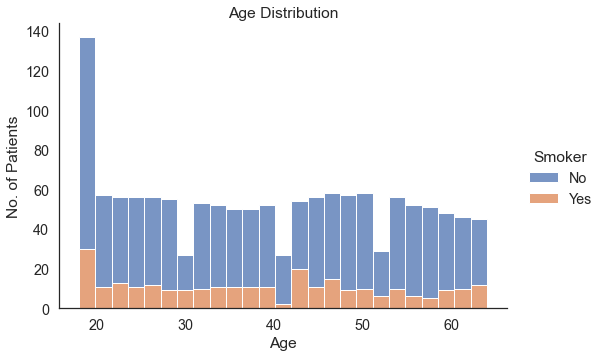

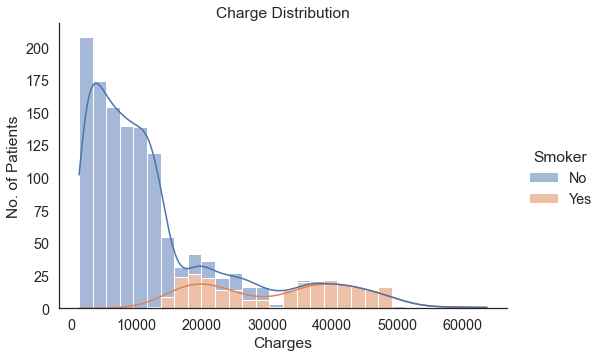

In [52]:
# Age distribution
sns.displot(data = improved_medical_Cost, x = 'Age', hue = 'Smoker', bins = 25, multiple = "stack", aspect = 1.5).set(ylabel = "No. of Patients", title = "Age Distribution")

# Charge Distribution
sns.displot(improved_medical_Cost, x = 'Charges', hue = 'Smoker', kde = True, multiple = "stack", aspect = 1.5).set(ylabel = "No. of Patients", title = "Charge Distribution")

#### 5.1.2 Intermediate Distribution Visualization

##### i. Distribution of Charge and Age

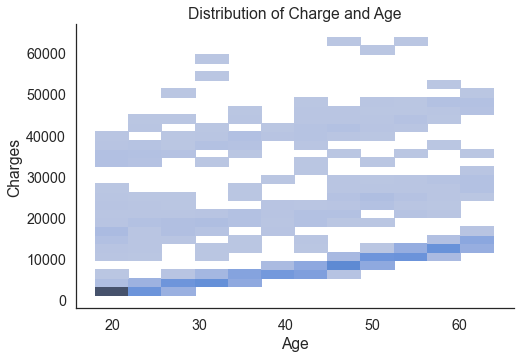

In [210]:
sns.displot(data = improved_medical_Cost, x = 'Age', y = 'Charges', aspect = 1.5).set(title = "Distribution of Charge and Age")

##### ii. Distribution of Charge and Smoker

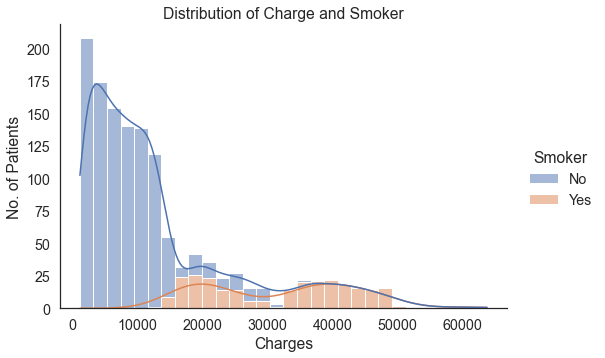

In [297]:
sns.displot(data = improved_medical_Cost, x = 'Charges', hue = 'Smoker', multiple = 'stack', kde = True, aspect = 1.5).set(title = "Distribution of Charge and Smoker", ylabel = "No. of Patients")

#### 5.1.3 Boxplot Visualizations

Boxplot graphically depicts groups of numerical data through quartiles and other statistics.

##### i. Boxplot Visualization for Charges

<AxesSubplot:ylabel='Charges'>

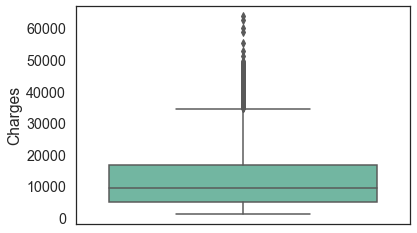

In [218]:
sns.boxplot(data = improved_medical_Cost, y = "Charges", palette = "Set2")

##### ii. Boxplot Visualization for BMI

<AxesSubplot:xlabel='BMI'>

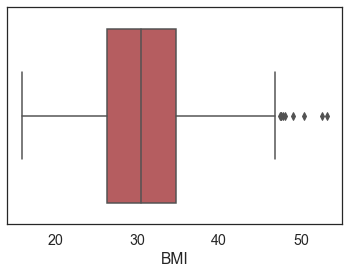

In [226]:
sns.boxplot(data = improved_medical_Cost, x = "BMI", color = "r")

##### iii. Boxplot Visualization for Smoker and Charges

<AxesSubplot:xlabel='Smoker', ylabel='Charges'>

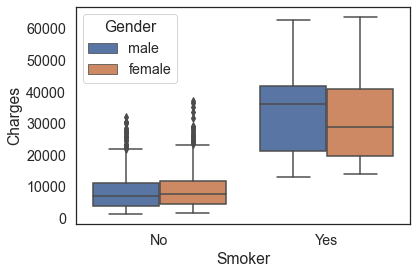

In [215]:
sns.boxplot(data = improved_medical_Cost, x = "Smoker", y = "Charges", hue = "Gender")